# Biblioteki:

In [53]:
from skimage import io
from skimage.exposure import rescale_intensity
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
import numpy as np
import random

import pandas as pd

from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Wczytanie 3 obrazów:

In [54]:
images = ['tekstury/Drewno/Drewno.jpg', 'tekstury/Marmur/Marmur.jpg', 'tekstury/Tynk/Tynk.jpg']

In [55]:
img_1 = io.imread(images[0])
img_2 = io.imread(images[1])
img_3 = io.imread(images[2])

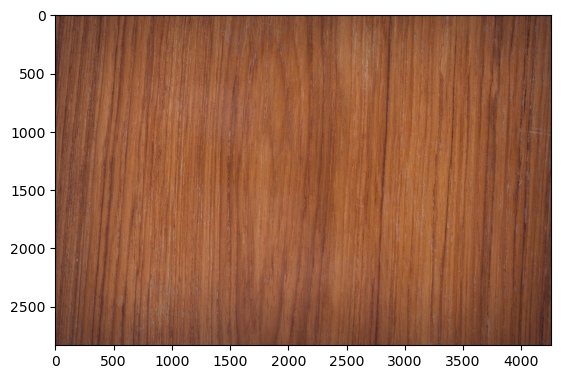

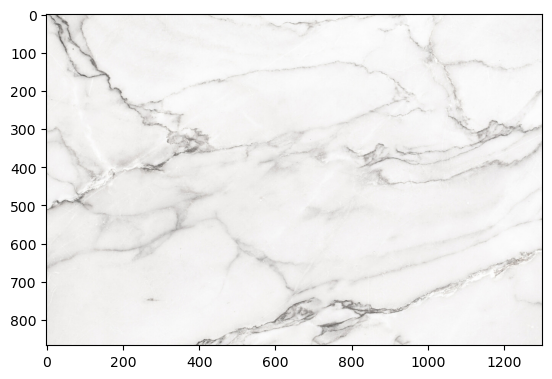

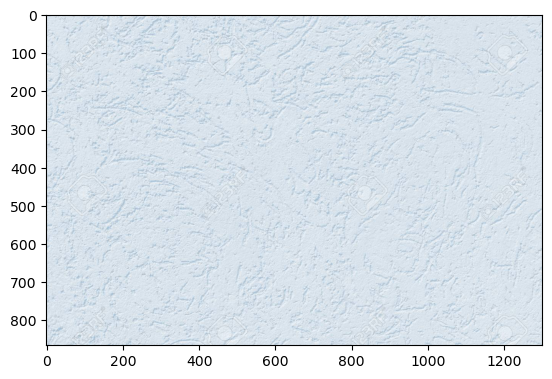

In [56]:
plt.figure()
plt.imshow(img_1)
plt.figure()
plt.imshow(img_2)
plt.figure()
plt.imshow(img_3)

# Wycinanie i zapisywanie próbek:

In [57]:
def get_samples(img, wymiar_x, wymiar_y, nosamples, sciezka):
    wymiary = np.shape(img)
    wymiary_x = wymiary[1]
    wymiary_y = wymiary[0]
    
    for i in range(0, nosamples):
        if wymiar_x > wymiary_x:
            print("Za duża wartosc 'wymiar_x'")
            exit()
        else:
            x_0 = random.randrange(0, wymiary_x-wymiar_x)
            x_k = x_0 + wymiar_x
    
        if wymiar_y > wymiary_y:
            print("Za duża wartosc 'wymiar_y'")
            exit()
        else:
            y_0 = random.randrange(0, wymiary_y-wymiar_y)
            y_k = y_0 + wymiar_y

        nazwa_pliku = sciezka + "/" + str(i) + ".jpg"
        probka = img[y_0:y_k, x_0:x_k, :]
        
        io.imsave(nazwa_pliku, probka)
        
    return

In [58]:
get_samples(img_1, 300, 300, 12, 'tekstury/Drewno/Drewno_probki')
get_samples(img_2, 300, 300, 12, 'tekstury/Marmur/Marmur_probki')
get_samples(img_3, 300, 300, 12, 'tekstury/Tynk/Tynk_probki')

# Wczytywanie próbek, przekształcenie do skali szarości i zmiana głębi jasności:

In [59]:
samples_drewno = []
samples_marmur = []
samples_tynk = []

for i in range (0, 12):
    nazwa_probki_drewno = 'tekstury/Drewno/Drewno_probki' + "/" + str(i) + ".jpg"
    probka_drewno = io.imread(nazwa_probki_drewno)
    probka_drewno = rgb2gray(probka_drewno)
    probka_drewno = rescale_intensity(probka_drewno, in_range=(0,1), out_range=(0,31))
    probka_drewno = np.array(probka_drewno)
    probka_drewno = probka_drewno.astype(np.uint8)
    samples_drewno.append(probka_drewno)

    nazwa_probki_marmur = 'tekstury/Marmur/Marmur_probki' + "/" + str(i) + ".jpg"
    probka_marmur = io.imread(nazwa_probki_marmur)
    probka_marmur = rgb2gray(probka_marmur)
    probka_marmur = rescale_intensity(probka_marmur, in_range=(0,1), out_range=(0,31))
    probka_marmur = np.array(probka_marmur)
    probka_marmur = probka_marmur.astype(np.uint8)    
    samples_marmur.append(probka_marmur)

    nazwa_probki_tynk = 'tekstury/Tynk/Tynk_probki' + "/" + str(i) + ".jpg"
    probka_tynk = io.imread(nazwa_probki_tynk)
    probka_tynk = rgb2gray(probka_tynk)
    probka_tynk = rescale_intensity(probka_tynk, in_range=(0,1), out_range=(0,31))
    probka_tynk = np.array(probka_tynk)
    probka_tynk = probka_tynk.astype(np.uint8)
    samples_tynk.append(probka_tynk)

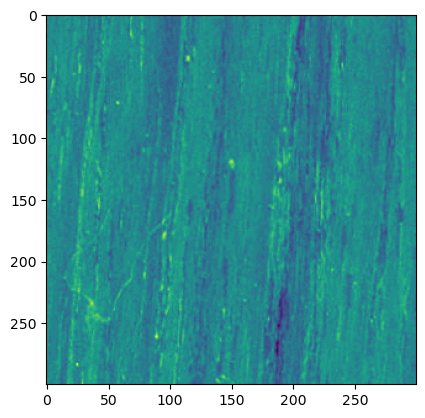

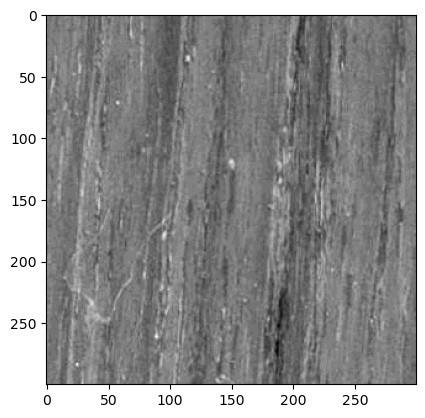

In [60]:
plt.figure()
plt.imshow(samples_drewno[0])
plt.figure()
plt.imshow(samples_drewno[0], cmap=plt.cm.gray)

# Wyznaczanie cech tekstur i zapis do csv

In [61]:
def wyznaczanie_cech(texture_sample, category):
    cechy = {
                'category' : category
    }
    distances = [1, 3, 5]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    angles_deg = [0, 45, 90, 135]

    glcm = graycomatrix(texture_sample, distances=distances, angles=angles, symmetric=True)

    dissimilarity = graycoprops(glcm, 'dissimilarity')
    correlation = graycoprops(glcm, 'correlation')
    contrast = graycoprops(glcm, 'contrast')
    energy = graycoprops(glcm, 'energy')
    homogeneity = graycoprops(glcm, 'homogeneity')
    asm = graycoprops(glcm, 'ASM')

    for d in range(0, len(distances)):
        for a in range(0, len(angles_deg)):
            dissimilarity_header = 'dissimilarity' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
            correlation_header = 'correlation' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
            contrast_header = 'contrast' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
            energy_header = 'energy' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
            homogeneity_header = 'homogeneity' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
            ASM_header = 'ASM' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
            
            cechy.update({
                dissimilarity_header : dissimilarity[d,a],
                correlation_header : correlation[d,a],
                contrast_header : contrast[d,a],
                energy_header : energy[d,a],
                homogeneity_header : homogeneity[d,a],
                ASM_header : asm[d,a]
            })
    return cechy

In [62]:
cechy_all_samples = []

for s in range(0, len(samples_drewno)):
    cechy_sample = wyznaczanie_cech(samples_drewno[s], 'drewno')
    cechy_all_samples.append(cechy_sample)

for s in range(0, len(samples_marmur)):
    cechy_sample = wyznaczanie_cech(samples_marmur[s], 'marmur')
    cechy_all_samples.append(cechy_sample)

for s in range(0, len(samples_tynk)):
    cechy_sample = wyznaczanie_cech(samples_tynk[s], 'tynk')
    cechy_all_samples.append(cechy_sample)

    
headers =[]
distances = [1, 3, 5]
angles_deg = [0, 45, 90, 135]
    
for d in range(0, len(distances)):
    for a in range(0, len(angles_deg)):
        dissimilarity_header = 'dissimilarity' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
        correlation_header = 'correlation' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
        contrast_header = 'contrast' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
        energy_header = 'energy' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
        homogeneity_header = 'homogeneity' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
        ASM_header = 'ASM' + '_' + str(distances[d]) + '_' + str(angles_deg[a]) + 'deg'
        
        headers.extend([
            dissimilarity_header,
            correlation_header,
            contrast_header,
            energy_header,
            homogeneity_header,
            ASM_header
        ])

headers.extend(['category'])
        
df = pd.DataFrame(cechy_all_samples, columns=headers)
df.to_csv('cechy', index=False)

# Wczytanie wektorów cech, PCA i SVM

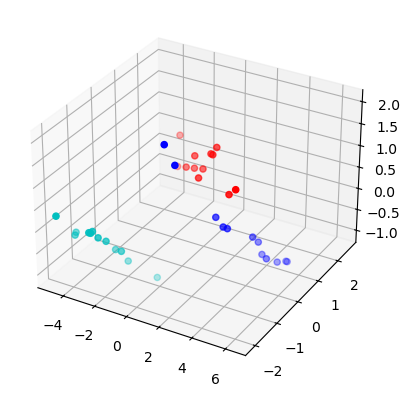

In [63]:
features = pd.read_csv('cechy', sep=',')

data = np.array(features)
X = (data[:,:-1]).astype('float64')
Y = data[:,-1]

x_transform = PCA(n_components=3)
Xt = x_transform.fit_transform(X)

red = Y == 'drewno'
blue = Y == 'marmur'
cyan = Y == 'tynk'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xt[red,0], Xt[red,1], Xt[red,2], c='r')
ax.scatter(Xt[blue,0], Xt[blue,1], Xt[blue,2], c='b')
ax.scatter(Xt[cyan,0], Xt[cyan,1], Xt[cyan,2], c='c')

In [64]:
classifier = svm.SVC(gamma='auto')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

1.0


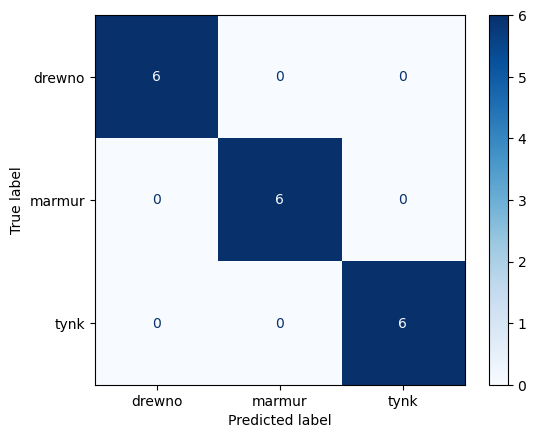

In [65]:
cm = confusion_matrix(y_test, y_pred)

cmap = plt.cm.Blues
cmap.set_under(color='white')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=cmap, values_format='d')

plt.show()